In [ ]:
pip install tensorflow

In [5]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import * 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os 

In [57]:
# sample for testset
data = {"id": list(range(1, 183)), "label": [0]*182}
df = pd.DataFrame(data)

# 비어있는 라벨 데이터[0] csv 파일로 저장
df.to_csv("/content/drive/MyDrive/ttproject/CNN_Sequential_test/sample.csv", index=False)

In [7]:
# 경로 설정 - 노출/비노출 trainset, 각각 500개씩 합쳐져있는 폴더
path = "/content/drive/MyDrive/ttproject/CNN_Sequential_test/노출train"
files = os.listdir(path)

for file in files:
    if file == ".DS_Store":
        os.remove(os.path.join(dpath, file))

In [8]:
# 데이터 형상 관련 상수 정의 
IMAGE_WIDTH = 216
IMAGE_HEIGHT = 216
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

# 학습 데이터 준비 
filenames = os.listdir(path)

df = pd.DataFrame(
    {"filename":sorted(filenames),
    "category":0}
)      
df

,filename,category
0,노출이미지001.jpg,0
1,노출이미지002.jpg,0
2,노출이미지003.jpg,0
3,노출이미지004.jpg,0
4,노출이미지005.jpg,0
...,...,...
995,비노출이미지496.jpg,0
996,비노출이미지497.jpg,0
997,비노출이미지498.jpg,0
998,비노출이미지499.jpg,0


In [9]:
# 노출=1, 비노출= 0으로 정답 레이블 (category) 생성
df.loc[:499, "category"] = 1

exposure_rows = df[df["category"] == 1]
print(exposure_rows)

               filename  category
0    노출이미지001.jpg         1
1    노출이미지002.jpg         1
2    노출이미지003.jpg         1
3    노출이미지004.jpg         1
4    노출이미지005.jpg         1
..                  ...       ...
495  노출이미지496.jpg         1
496  노출이미지497.jpg         1
497  노출이미지498.JPG         1
498  노출이미지499.jpg         1
499  노출이미지500.jpg         1

[500 rows x 2 columns]


In [10]:
# 확인 
nonexposure_rows = df[df["category"] == 0]
print(nonexposure_rows)

df

                 filename  category
500  비노출이미지001.jpg         0
501  비노출이미지002.jpg         0
502  비노출이미지003.jpg         0
503  비노출이미지004.jpg         0
504  비노출이미지005.jpg         0
..                    ...       ...
995  비노출이미지496.jpg         0
996  비노출이미지497.jpg         0
997  비노출이미지498.jpg         0
998  비노출이미지499.jpg         0
999  비노출이미지500.jpg         0

[500 rows x 2 columns]


,filename,category
0,노출이미지001.jpg,1
1,노출이미지002.jpg,1
2,노출이미지003.jpg,1
3,노출이미지004.jpg,1
4,노출이미지005.jpg,1
...,...,...
995,비노출이미지496.jpg,0
996,비노출이미지497.jpg,0
997,비노출이미지498.jpg,0
998,비노출이미지499.jpg,0


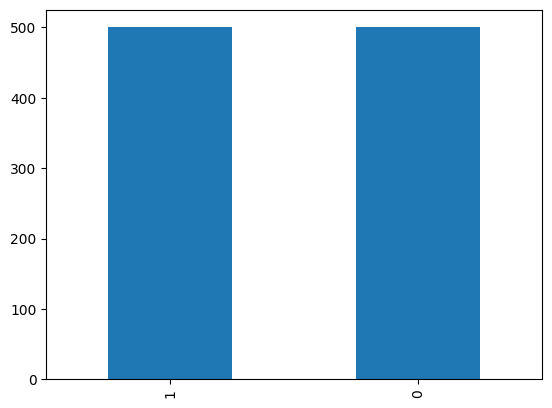

In [11]:
df['category'].value_counts().plot.bar()
plt.show()

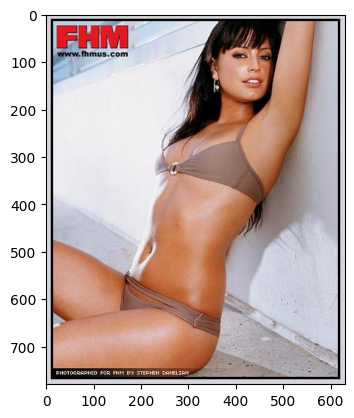

In [12]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

# 샘플 이미지 불러오기
sample = random.choice(filenames)
img_path = os.path.join(path, sample)
image = load_img(img_path)
plt.imshow(image)

In [13]:
# 배치정규화(Batch Normalization): 신경망 입력 데이터를 평균 : 0 , 분산: 1로 정규화를 해서 학습이 잘 이루어지도록 하는 방법 

# 모델 생성

from keras.models import Sequential
from keras.layers import * 

In [14]:
# 레이어 1
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH , IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 레이어 2 
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 레이어3
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
# Fully Connected 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation="softmax"))

In [15]:
# 모델 실행 옵션 
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 214, 214, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 214, 214, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 107, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 107, 107, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 105, 105, 64)     2

In [16]:
# reduceLROnPlateau: 모델의 정확도가 향상되지 않는 경우 ㅡ learning rate (lr) 을 줄여주는 클래스
# : callback 함수의 일종, learning rate가 더이상 업데이트가 되지 않으면, 학습을 중단해라
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(
                        monitor= "val_accuracy", 
                        patience = 2, 
                        factor = 0.5, 
                        min_lr=0.0001,
                        verbose=1)
                        
callbacks = [earlystop, learning_rate_reduction]

In [17]:
# 이미지 제너레이터에서 class_mode = "categorical"로 지정하기 위해 컬럼 카테고리를 스트링으로 변경함. 
df['category']=df['category'].replace({0:'비노출',1:"노출"})

In [18]:
# test, validate 데이터 분리

train_df, validate_df = train_test_split(df , test_size=0.2, random_state= 42)

train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [19]:
train_df['category'].value_counts()

노출     404
비노출    396
Name: category, dtype: int64

In [20]:
validate_df['category'].value_counts()

비노출    104
노출      96
Name: category, dtype: int64

In [21]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=8

# 트레이닝 데이터의 제너레이터 설정 
train_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1, 
        height_shift_range=0.1)
        
train_generator=train_datagen.flow_from_dataframe(
    train_df, 
    path,
    x_col = "filename", 
    y_col = "category",
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size )
    
validate_datagen=ImageDataGenerator(rescale=1./255)
# 검증이미지니까, 사진 그대로 쓰겠다. 

validation_generator=validate_datagen.flow_from_dataframe(
    validate_df,
    path,
    x_col= "filename",
    y_col= "category",
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size )

Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [18]:
# 샘플 데이터 확인
example_df=train_df.sample(n=1).reset_index(drop=True)
example_df

,filename,category
0,노출이미지104.jpg,노출


In [19]:
example_generator = train_datagen.flow_from_dataframe(
                    example_df,
                    path,
                    x_col = "filename",
                    y_col = "category",
                    target_size = IMAGE_SIZE,
                    class_mode = "categorical")

Found 1 validated image filenames belonging to 1 classes.


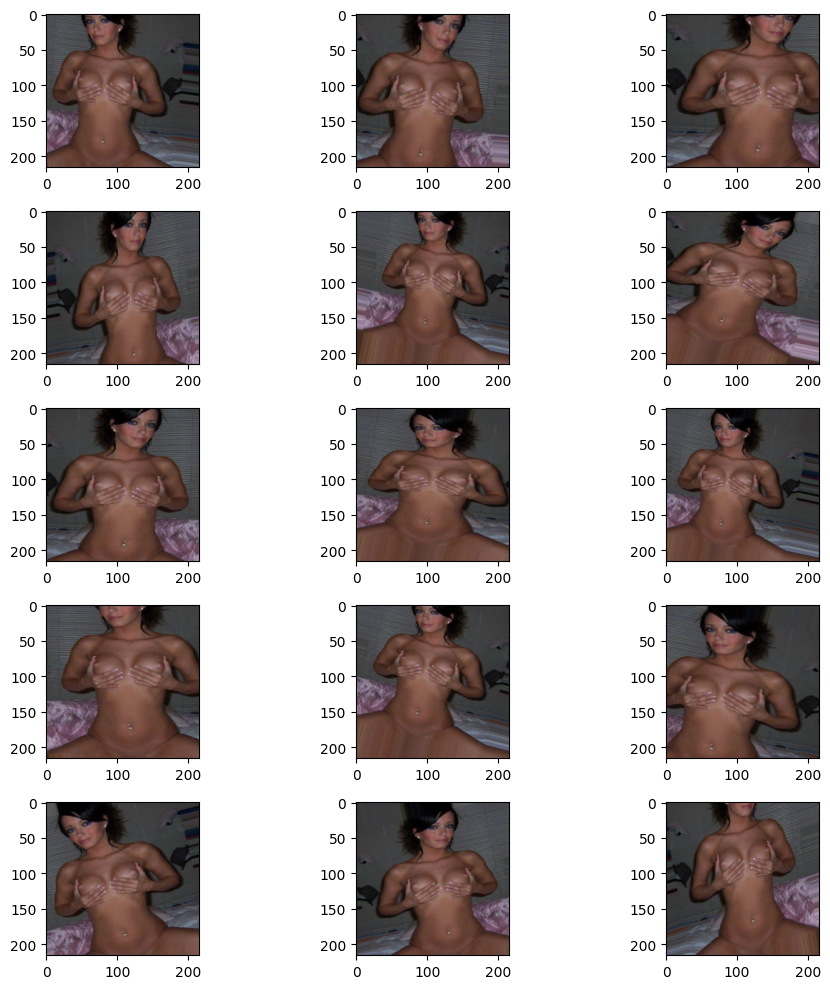

In [20]:
plt.figure(figsize=(10,10))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [21]:
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [22]:
# 가장 높은 성능의 모델을 저장
# 콜백값에 추가해서 EarlyStopping, ReduceLROnPlateau랑 같이 사용
# 그러면 학습 중에 성능 향상이 없는 경우 조기 종료하고, 학습률을 조정하면서, 가장 좋은 성능의 모델 가중치를 저장할 수 있다!
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks = [earlystop, learning_rate_reduction, checkpoint]

In [24]:
# 트레이닝
epochs = 10

history = model.fit(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,
    validation_data=  validation_generator,
    validation_steps = total_validate//batch_size,
    callbacks = callbacks,
)

# 모델 저장 
model.save("/content/drive/MyDrive/ttproject/CNN_Sequential_test/sequential_exposure_best_model.h5")


## truncated = True로 설정

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.6925
Epoch 1: val_accuracy improved from 0.67500 to 0.68500, saving model to weights.h5
100/100 [==============================] - 24s 237ms/step - loss: 0.5975 - accuracy: 0.6925 - val_loss: 0.6533 - val_accuracy: 0.6850 - lr: 2.5000e-04
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.6315 - accuracy: 0.6687
Epoch 2: val_accuracy improved from 0.68500 to 0.69000, saving model to weights.h5
100/100 [==============================] - 24s 242ms/step - loss: 0.6315 - accuracy: 0.6687 - val_loss: 0.6393 - val_accuracy: 0.6900 - lr: 2.5000e-04
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.5973 - accuracy: 0.6800
Epoch 3: val_accuracy did not improve from 0.69000
100/100 [==============================] - 23s 227ms/step - loss: 0.5973 - accuracy: 0.6800 - val_loss: 0.7876 - val_accuracy: 0.5900 - lr: 2.5000e-04
Epoch 4/10
100/100 [======================

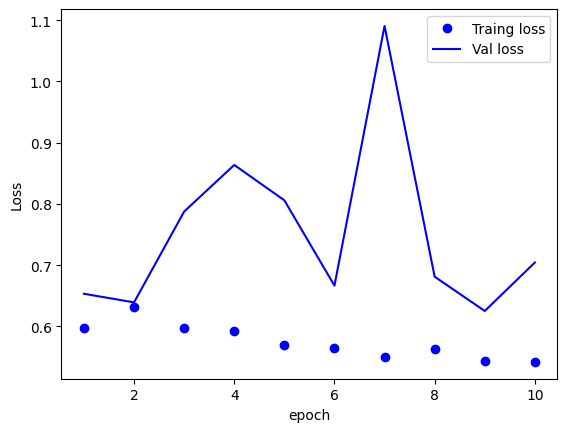

In [25]:
# 트레이닝 모델 히스토리 시각화 

historyDict=history.history

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

%matplotlib inline
epo = range(1, len(acc)+1)
plt.plot(epo, loss, 'bo', label="Traing loss")
plt.plot(epo, val_loss, 'b', label="Val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

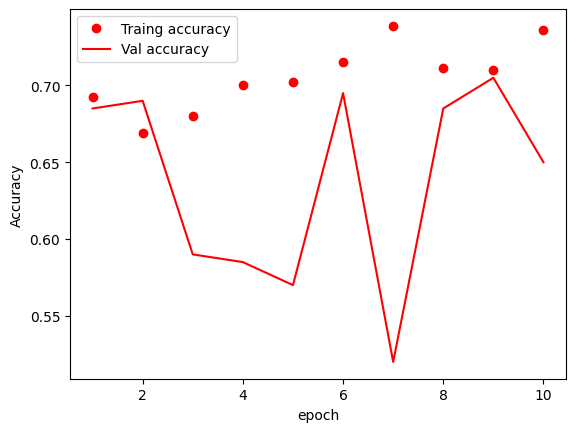

In [26]:
%matplotlib inline
plt.plot(epo, acc, 'ro', label="Traing accuracy")
plt.plot(epo, val_acc, 'r', label="Val accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [81]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/ttproject/CNN_Sequential_test/sequential_exposure_best_model.h5")

In [82]:
# 모델 컴파일
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 214, 214, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 214, 214, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 107, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 107, 107, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 105, 105, 64)     2

In [83]:
# 테스트 데이터 182개
filenames = os.listdir("/content/drive/MyDrive/ttproject/CNN_Sequential_test/노출test")

test_df=pd.DataFrame( {"filename":filenames} )      
test_df

,filename
0,노출이미지523.jpg
1,노출이미지516.jpg
2,노출이미지526.jpg
3,노출이미지506.jpg
4,노출이미지515.jpg
...,...
177,비노출이미지647.jpg
178,비노출이미지641.jpg
179,비노출이미지652.jpg
180,비노출이미지621.jpg


In [84]:
nbsamples=test_df.shape[0]
nbsamples

182

In [85]:
# 테스트 데이터 생성
# 테스트 이미지니까, 사진 그대로 씀
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
    test_df,
    "/content/drive/MyDrive/ttproject/CNN_Sequential_test/노출test",
    x_col= "filename",
    y_col= None,
    target_size = IMAGE_SIZE,
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

Found 182 validated image filenames.


In [ ]:
# 모델의 테스트 성능 평가
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [86]:
# 예측
predict=model.predict_generator(test_generator, 
                                steps=nbsamples/batch_size, 
                                callbacks=callbacks)
                                
test_df['category']=np.argmax(predict, axis=1)

<ipython-input-86-079cbf79369e>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict=model.predict_generator(test_generator,


In [87]:
# 테스트 샘플 랜덤으로 추출해서 확인 

test_df['category']=test_df['category'].replace({0:'비노출',1:"노출"})
ex_df=test_df.sample(n=1).reset_index(drop=True)
ex_df

,filename,category
0,비노출이미지604.jpg,비노출


In [88]:
ex_generator = test_datagen.flow_from_dataframe(
                    ex_df,
                    "/content/drive/MyDrive/ttproject/CNN_Sequential_test/노출test",
                    x_col = "filename",
                    y_col = None,
                    target_size = IMAGE_SIZE,
                    class_mode = None)

Found 1 validated image filenames.


In [89]:
test_sample=list(ex_df.filename)

sample = ""
for test in test_sample:
    sample += test

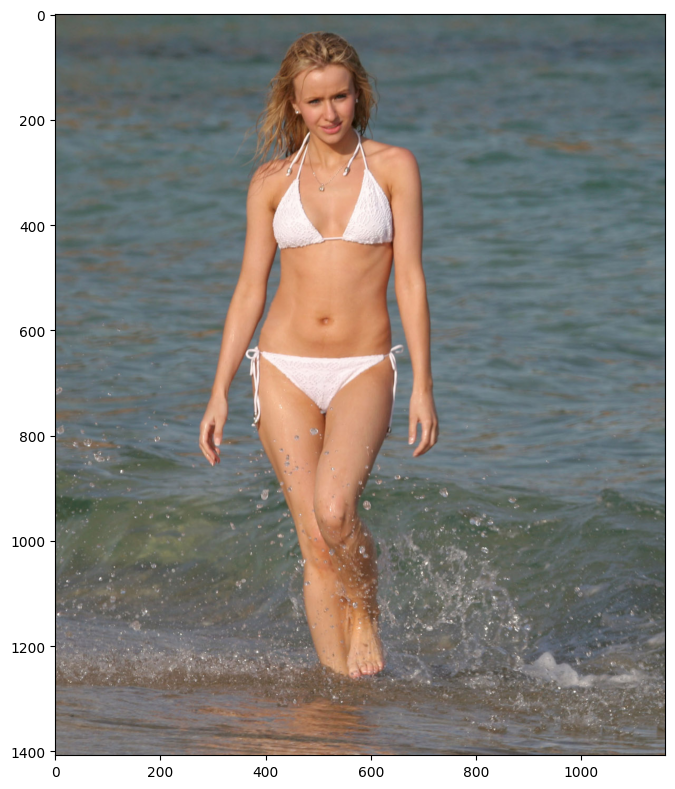

In [90]:
path = os.path.join("/content/drive/MyDrive/ttproject/CNN_Sequential_test/노출test", sample)
image = load_img(path)
plt.figure(figsize=(8,8))
plt.imshow(image)

plt.tight_layout()
plt.show()

In [91]:
sampleSubmission=pd.read_csv("/content/drive/MyDrive/ttproject/CNN_Sequential_test/sample.csv", dtype="object")
sampleSubmission

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
177,178,0
178,179,0
179,180,0
180,181,0


In [99]:
# 테스트 이미지 파일 경로
test_image_path = "/content/drive/MyDrive/ttproject/CNN_Sequential_test/노출test"

# 테스트 이미지 파일명 생성
test_filenames = []
for i in range(1, 183):
    filename1 = f"노출이미지{str(i).zfill(3)}.jpg"
    filename2 = f"비노출이미지{str(i).zfill(3)}.jpg"
    test_filenames.append(filename1)
    test_filenames.append(filename2)

# 테스트 데이터프레임 생성
test_df = pd.DataFrame({'filename': test_filenames})

# 모델을 사용하여 노출/비노출 예측
predictions = model.predict(test_generator)

# 예측 확률을 'predictions' 컬럼에 저장
test_df['predictions'] = predictions.tolist()

# 결과를 파일로 저장
test_df.to_csv("/content/drive/MyDrive/ttproject/CNN_Sequential_test/exposure_predictions.csv", index=False)

23/23 [==============================] - 5s 202ms/step


ValueError: ignored